In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df_can=pd.read_excel(r'./dataset/Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                    skiprows=range(20),
                    skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country','AreaName':'Continent', 'RegName':'Region'},inplace=True)
df_can.columns=list(map(str,df_can.columns))
df_can.set_index('Country',inplace=True)
df_can['Total']=df_can.sum(axis=1)
years=list(map(str,range(1980,2014)))

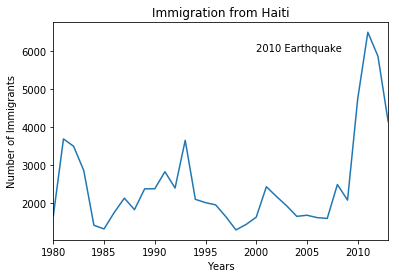

In [4]:
haiti = df_can.loc['Haiti', years] 
haiti.index = haiti.index.map(int) 
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')


plt.text(2000, 6000, '2010 Earthquake')

plt.show() 

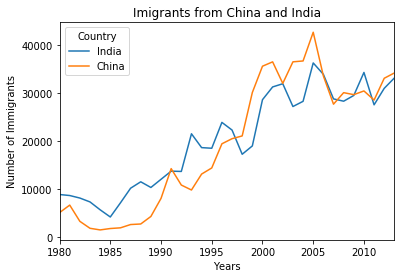

In [5]:
df_CI = df_can.loc[['India', 'China'], years]
df_CI = df_CI.transpose()
df_CI.index = df_CI.index.map(int) 
df_CI.plot(kind='line')

plt.title('Imigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

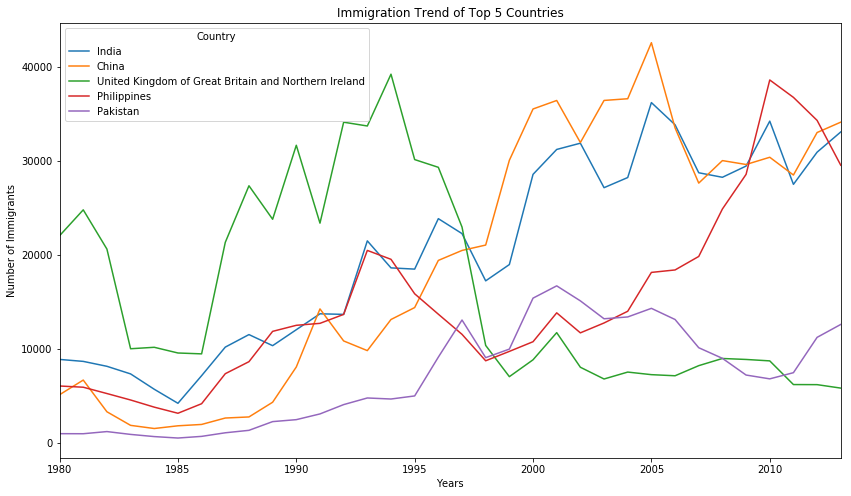

In [6]:
df_can.sort_values(['Total'],ascending=False,axis=0,inplace=True)
df_top5 = df_can.head(5)

df_top5 = df_top5[years].transpose() 

df_top5.index = df_top5.index.map(int) 
df_top5.plot(kind='line', figsize=(14, 8))
#print(df_top5)

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

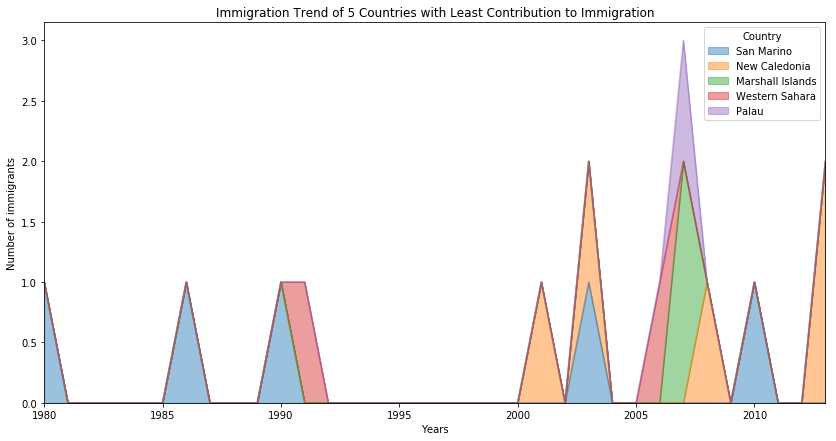

In [7]:
df_least5=df_can.tail(5)
df_least5=df_least5[years].transpose()
#print(df_least5)
df_least5.index=df_least5.index.map(int)
df_least5.plot(kind='area', alpha=0.45, figsize=(14,7),stacked=True) 

plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

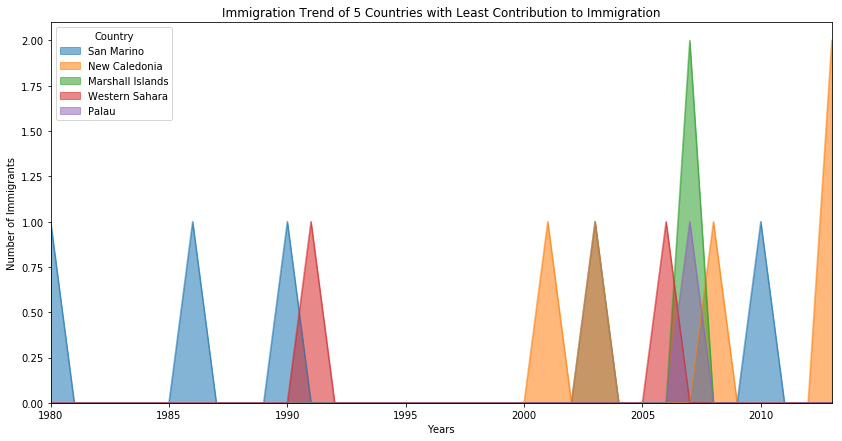

In [8]:
df_least5 = df_can.tail(5)
df_least5 = df_least5[years].transpose() 
#print(df_least5.head())
ax = df_least5.plot(kind='area', alpha=0.55, figsize=(14,7 ),stacked=False)

ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

In [9]:
count, bin_edges = np.histogram(df_can['2013'])

print(count) 
print(bin_edges) 

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


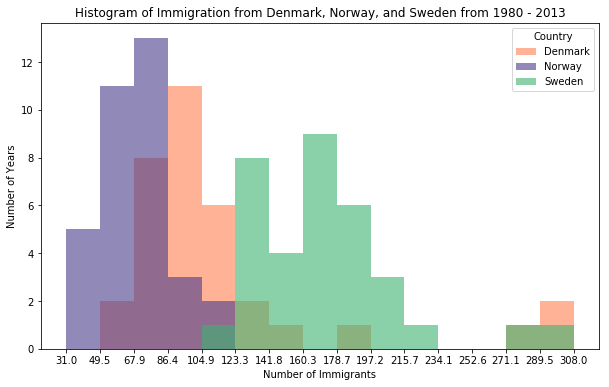

In [10]:
df_dns_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
count, bin_edges = np.histogram(df_dns_t, 15)
df_dns_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

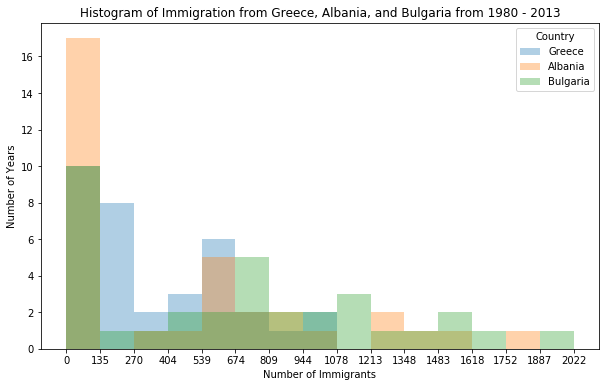

In [11]:
df_gab = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]
df_gab = df_gab.transpose() 
count, bin_edges = np.histogram(df_gab, 15)
df_gab.plot(kind ='hist',
            figsize=(10, 6),
            bins=15,
            alpha=0.35,
            xticks=bin_edges
            )
plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

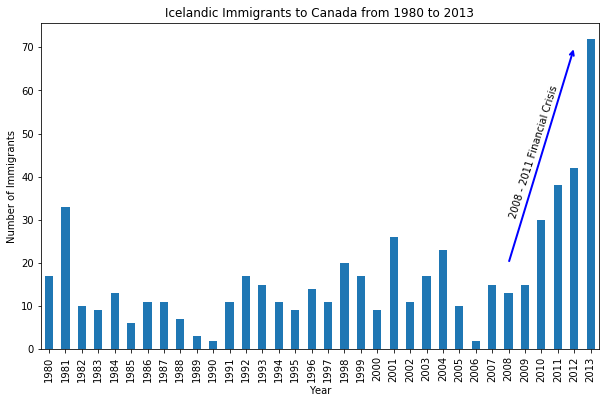

In [12]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.plot(kind='bar', figsize=(10, 6),rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

plt.annotate('',                      
             xy=(32, 70),            #head
             xytext=(28, 20),        #base
             xycoords='data',        
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.annotate('2008 - 2011 Financial Crisis', 
             xy=(28, 30),    #text start                
             rotation=72.5,                 
             va='bottom',                    
             ha='left',                      
            )

plt.show()

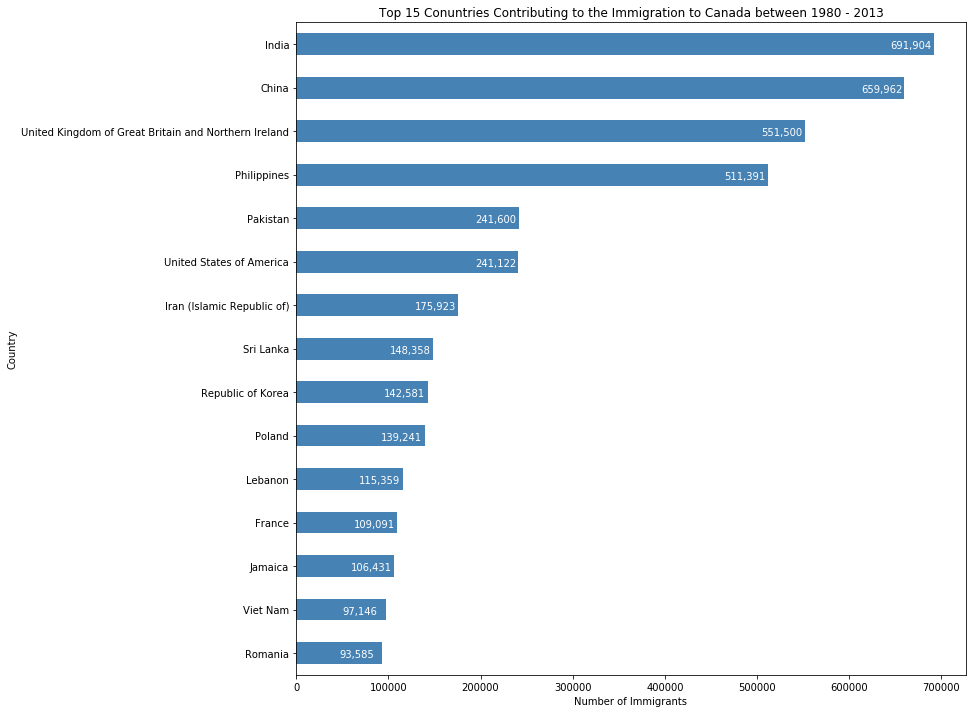

In [13]:
df_can.sort_values(['Total'],ascending=True,inplace=True,axis=0)
df_top15=df_can.tail(15)
df_top15=df_top15['Total']


df_top15.plot(kind='barh',figsize=(12,12),color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')
for index,value in enumerate(df_top15):
    #print(index,'  ',value)
    label=format(value,',')
    plt.annotate(label,xy=(value-47000,index-0.1),color='white')
plt.show()

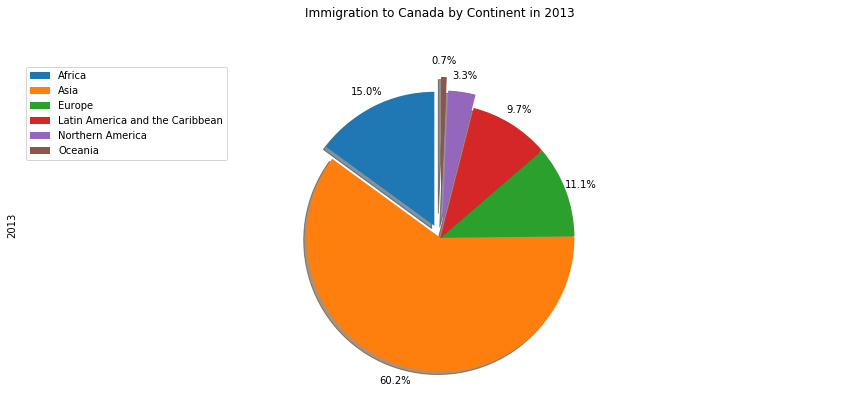

In [14]:
df_continents = df_can.groupby('Continent', axis=0).sum()
explode_list = [0.1, 0, 0, 0, 0.1, 0.2]
#print(df_continents['2013'])
df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,  
                            explode=explode_list  
                            )


plt.title('Immigration to Canada by Continent in 2013', y=1.12) 

plt.axis('equal') 

plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

Country         China         India
count       34.000000     34.000000
mean     19410.647059  20350.117647
std      13568.230790  10007.342579
min       1527.000000   4211.000000
25%       5512.750000  10637.750000
50%      19945.000000  20235.000000
75%      31568.500000  28699.500000
max      42584.000000  36210.000000


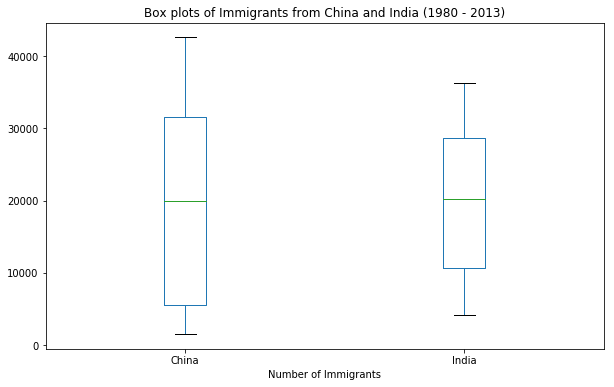

In [15]:
df_CI= df_can.loc[['China', 'India'], years].transpose()
print(df_CI.describe())

df_CI.plot(kind='box',figsize=(10,6))
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')
plt.show()


                                                     1980s   1990s   2000s
Country                                                                   
India                                                82154  180395  303591
China                                                32003  161528  340385
United Kingdom of Great Britain and Northern Ir...  179171  261966   83413
Philippines                                          60764  138482  172904
Pakistan                                             10591   65302  127598
               1980s          1990s          2000s
count      15.000000      15.000000      15.000000
mean    44418.333333   85594.666667   97471.533333
std     44190.676455   68237.560246  100583.204205
min      7613.000000   30028.000000   13629.000000
25%     16698.000000   39259.000000   36101.500000
50%     30638.000000   56915.000000   65794.000000
75%     59183.000000  104451.500000  105505.500000
max    179171.000000  261966.000000  340385.000000


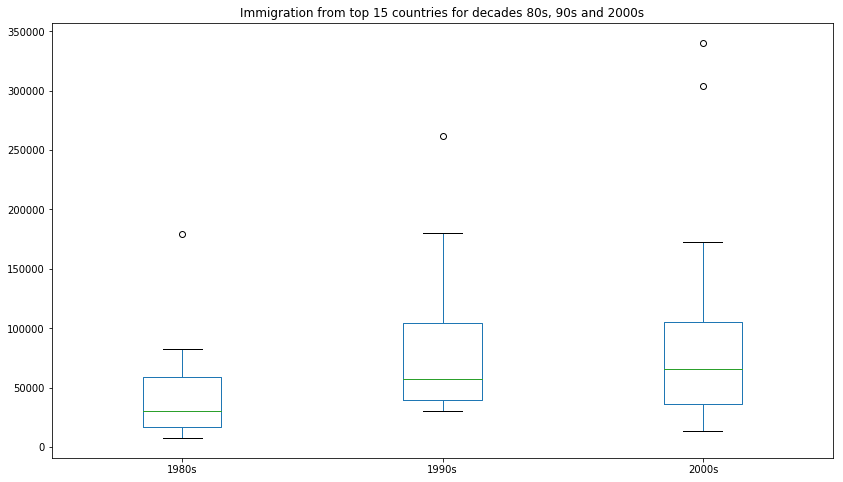

In [16]:
df_top15=df_can.sort_values(['Total'],ascending=False,axis=0).head(15)
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 
print(new_df.head())
print(new_df.describe())

new_df.plot(kind='box',figsize=(14,8))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()


******************************
Country  Denmark  Norway  Sweden
1980         272     116     281
1981         293      77     308
1982         299     106     222
1983         106      51     176
1984          93      31     128
1985          73      54     158
1986          93      56     187
1987         109      80     198
1988         129      73     171
1989         129      76     182
1990         118      83     130
1991         111     103     167
1992         158      74     179
1993         186      92     203
1994          93      60     192
1995         111      65     176
1996          70      70     161
1997          83     104     151
1998          63      31     123
1999          81      36     170
2000          93      56     138
2001          81      78     184
2002          70      74     149
2003          89      77     161
2004          89      73     129
2005          62      57     205
2006         101      53     139
2007          97      73     193
2008        

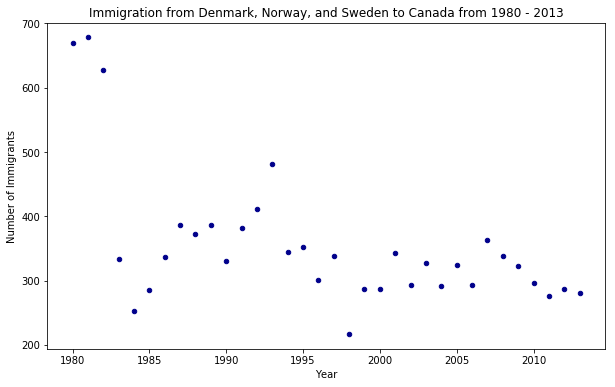

In [17]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
print('*'*30,df_countries,sep='\n')

df_total = pd.DataFrame(df_countries.sum(axis=1))
print('*'*30,df_total,sep='\n')

df_total.reset_index(inplace=True)
print('*'*30,df_total,sep='\n')

df_total.columns = ['year', 'total']
print('*'*30,df_total,sep='\n')

df_total['year'] = df_total['year'].astype(int)
print('*'*30,df_total,'*'*30,sep='\n')

print(df_total.head())

df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

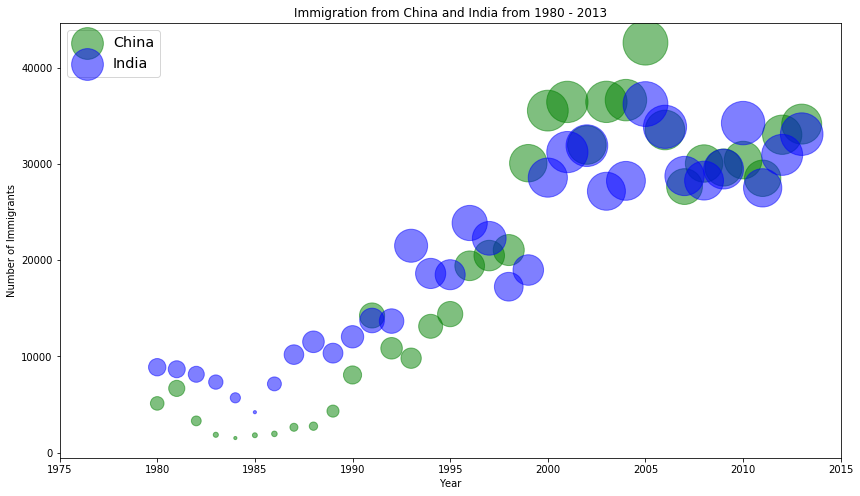

In [18]:
df_can_t = df_can[years].transpose() 
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')
plt.show()

In [19]:
import folium
mexico_latitude = 23.6345 
mexico_longitude = -102.5528
mexico_map = folium.Map(location=[mexico_latitude, mexico_longitude], zoom_start=4)
mexico_map

In [20]:
mexico_latitude = 23.6345 
mexico_longitude = -102.5528
mexico_map = folium.Map(location=[mexico_latitude, mexico_longitude], zoom_start=6, tiles='Stamen Terrain')

mexico_map
